## Gradiente Descendente na prática

## O que vamos ver hoje:
* O que é machine learning
* Modelagem no contexto de ML
* Exemplo de um modelo
* Introdução - regressão linear
* Criando dados sintéticos
* O problema fundamental
* Como medir o erro
* Gradiente Descendente
* Fim

## Machine Learning

![](imgs/machine_learning_diagram.png)
Fonte: https://www.ironhack.com/br/data-analytics/o-que-e-machine-learning

## Regressão e Classificação
![](imgs/regression_vs_classification.png)
Fonte: https://www.javatpoint.com/regression-vs-classification-in-machine-learning

## Modelagem e aprendizado
![](imgs/model_diagram.png)

## Exemplo: modelo de machine learning

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

dataset = load_boston()
features = dataset['data']
label = pd.Series(dataset['target'],name='MEDV')
feature_names = dataset['feature_names']
description = dataset['DESCR']

df = pd.DataFrame(features, columns=feature_names)
df = pd.concat((df,label), axis=1)

In [6]:
# Dataset: Boston house prices dataset
# RM       average number of rooms per dwelling
# MEDV     Median value of owner-occupied homes in $1000's
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exemplo: modelo de machine learning

In [7]:
from sklearn.linear_model import SGDRegressor

X = df[['RM']]
y = df['MEDV']

# Fitando/treinando o modelo (regressão linear usnado stochastic gradient descent)
model = SGDRegressor(loss='squared_loss', alpha=0, eta0=0.01, max_iter=1000)
model.fit(X, y)

# Printando os coeficientes
(model.intercept_, model.coef_)

(array([-6.56136165]), array([4.5346576]))

In [9]:
# Novos exemplos
new_samples = np.array([6, 7]).reshape((-1, 1))

# Fazendo uma predição
model.predict(new_samples)

array([20.64658395, 25.18124155])

## Regressão Linear e equação da reta

\begin{equation}
\hat{Y} = b + w X + \epsilon
\end{equation}
![](imgs/Linear_regression.svg)

## Gradiente descendente na prática

## Contexto de negócio

Uma ONG chamada MaisAlegria, deseja mapear o grau de felicidade de diferentes regiões do Brasil para assim conseguir aplicar diferentes políticas públicas visando maximizar esse indicador. Você é um cientista social contratado para auxiliar a instituição nessa tarefa. 

Nesse contexto, foi feta uma pesquisa com 500 pessoas, cuja a renda varia de 1039.00 até 10000.00, nessa pesquia é pedido que a pessoa classifique sua felicidade em uma escala de 1 a 10. A ONG deseja usar os dados dessa pesquisa para extrapolar o grau de felicidades para diferentes regiões do Brasil usando dados de renda das pessoas como proxy.

**objetivo:** Criar um modelo de regressão para prever o grau de felicidade a partir da renda


## Criando dados sintético

In [78]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Simulando o mundo real (a pesquisa)

# Algumas pessoas podem ter opiniões diferentes sobre o nível de felicidade
error = np.random.normal(loc=0.0, scale=1, size=1000)

# Temos o mesmo número de pessoas para diferentes salários (pesquisa estratificada)
income = np.random.uniform(1039, 10000, size=1000)
income = income/1000.0

# Vamos tomar como dado, que a felicidade segue a seguinte função matemática:
# y = 1 + 0.7*x + error
# e.g when income = 10000 +> y = 1 + 0.7*10 + error = 8 + error
happiness = 1 + income*0.7 + error

## Criando o dataframe sintético

In [11]:
# Criando nosso dataframe
df_survey = pd.DataFrame({'happiness' : happiness, 'income' : income})
df_survey = df_survey[(df_survey.happiness >= 1) & (df_survey.happiness <= 10)]
df_survey['income_group'] = pd.cut(df_survey['income'], 8)
df_survey.head()

,happiness,income,income_group
0,6.025820,7.461963,"(6.646, 7.763]"
1,7.993260,9.276143,"(8.88, 9.997]"
2,8.052671,8.714977,"(7.763, 8.88]"
3,5.767968,2.642460,"(2.177, 3.294]"
4,3.435323,2.502463,"(2.177, 3.294]"


## Distribuição do salário

<AxesSubplot:xlabel='income_group', ylabel='count'>

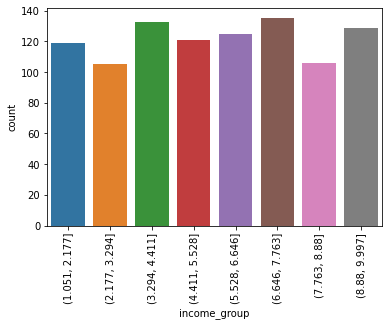

In [12]:
g = sns.countplot(df_survey.income_group)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

## Plotando o error (error)

<AxesSubplot:>

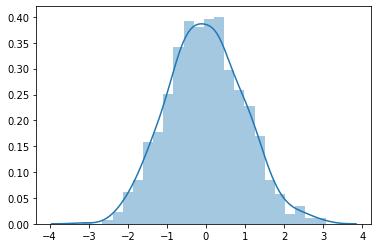

In [79]:
sns.distplot(error)

## Distribuição do grau de felicidade vs salário

<AxesSubplot:xlabel='income', ylabel='happiness'>

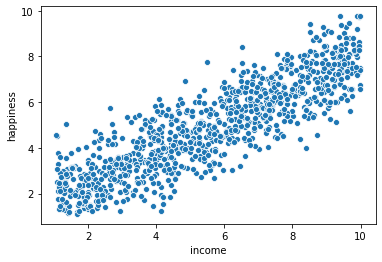

In [14]:
sns.scatterplot(x='income',y='happiness', data=df_survey)

## Formulando o problema

Sempre que falamos de aprendizado surpervisionado (e em alguns casos de unsurpervised) em Machine Learning, estamos falando de uma função que estamos tentando **otimizar**.  

 Quando falamos de otimização, estamos nos referindo a algo que queremos *minimizar* ou *maximizar*.

# Mas qual a reta perfeita?

Decidimos usar uma reta para fazer uma estimativa dos nossos dados, certo? Mas qual seriam os parametos $w$ e $b$ ideais? Lembra do que falamos no começo da aula? No caso $w$ e $b$ são os parâmetos ideais e queremos usá-los para aprender a reta. Mas como que aprendemos?

Ora, e se a gente chutasse quais são esses valores? Que tal começarmos com 0? Mas pode ser qualquer coisa!

In [15]:
x = df_survey['income']
y = df_survey['happiness']
w=0.0 
b=0.0
y_hat = w*x + b

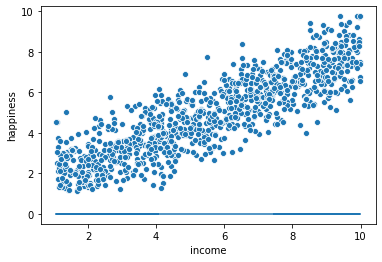

In [16]:
sns.scatterplot(x, y)
plt.plot(x, y_hat);

# A métrica de erro (loss function)

Visualmente, não parece que a reta resume bem os nossos dados. 

*Pergunta:* Mas podemos ter alguma métrica de erro para definir isso?  

Lembrem-se que estamos falando de um problema de otimização, então podemos dizer que montar uma função de erro (também conhecida como _função de custo_, ou cost function) que deve ser **minimizada**. Em outras palavras, queremos que dados $w$ e $b$, o erro seja o menor possível.

Existem várias formas de fazer isso, mas vamos definir a seguinte:

- Calculamos a diferença entre o valor real e o predito, ou seja ($y - \hat{y}$)

- Como para alguns pontos $y \geq \hat{y}$ e $y \leq \hat{y}$ para outros, os valores podem se anular. Então elevamos tudo ao quadrado, $(y - \hat{y})^2$

- Somamos para todos os pontos e tiramos a média.

Em resumo, nosso erro é definido por:

Erro = $J = \frac{1}{n}\sum{ (y_i - \hat{y_i})^2}$, para cada $i$ do nosso dataset.

Lembrando que queremos encontrar $w$ e $b$ e $\hat{y} = wx + b$, então:

$J = \frac{1}{n}\sum{ (y_i - (wx_i+b))^2}$

\begin{equation}
y_i = valor \quad real \\
(wx_i+b) = valor \quad predito \\
(y_i - (wx_i+b))^2 = Erro \quad ao \quad quadrado \\
\end{equation}

Ou seja, nós elevamos os erros ao quadrado e tiramos a média, daí o nome Mean Squared Error, uma função de custo (cost/loss) muito famosa no campo de ML.

## Erro quadrado em código

In [82]:
def squared_error(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: squared error loss
    """ 
    return np.sum((true - pred)**2)

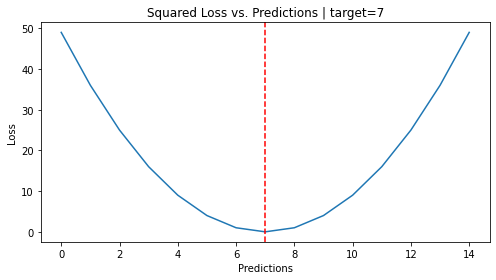

In [19]:
fig, ax1 = plt.subplots(1,1, figsize = (7,4))

# array of same target value 10000 times
target = np.repeat(7, 15) # y real
pred = np.arange(0,15, 1) # 0, 1, 2, 3, 4, 5 ... 15

squared_loss = [squared_error(target[i], pred[i]) for i in range(len(pred))]

(y - yh)ˆ2

# plot 
ax1.plot(pred, squared_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Squared Loss vs. Predictions | target=7")
plt.axvline(x=7, color='red', linestyle='--')

fig.tight_layout()

Acima vemos o plot de um erro quadrático quando o target de _um ponto_ é 7 e temos diferentes previsões que variam de $-\infty$ a $+\infty$. Podemos ver claramente que essa função tem um **mínimo** para um ponto. O que queremos é que diferença entre a previsão de *todos* os pontos e o valor *real* seja a menor possível :)

## Montando nossa loss (MSE) em código

In [20]:
def predict(w, b, inputs):
    return w*inputs + b

def squared_error(true, pred):
    return np.sum((true - pred)**2)

def mse(w, b, inputs, targets):
    preds = predict(w, b, inputs)
    # squared_error = np.sum((true - pred)**2)
    return np.mean(squared_error(targets,preds))

loss = mse

In [21]:
w, b = 0.0, 0.0
X = df_survey['income'].values
y = df_survey['happiness'].values
loss(w, b, inputs=X, targets=y)

27427.545261886287

No caso, a _média_ dos _erros_ com os nossos dados é de $\approx 26541$ com base na reta que a gente escolheu. Como a gente consegue melhorar isso?

# Aprendendo a reta com gradiente descendente
O que queremos agora, então, é desenvolver um algoritmo que aprenda o peso $w$ e o $b$ (os parâmetos do nosso modelo)

\begin{equation}
\hat{y} = b + wx \\
loss = J = (y - (b + wx))^2 \\
\frac{\partial J}{\partial w} = \frac{\partial J}{\partial w} (y - \hat{y})^2 \\
\frac{\partial J}{\partial b} = \frac{\partial J}{\partial b} (y - \hat{y})^2
\end{equation}

##  Relembrando derivada (Intuição)

![](imgs/dy_dx.png)

## Gradiente na função loss

![](imgs/down_hill.png)

# Então como usar o gradiente ??

$
\begin{align}
\text(gradiente \; w) = \frac{\partial J}{\partial w} = 2\;(y - \hat{y}) * X \\
\end{align}
$

$
\begin{align}
\text(gradiente \; b) = \frac{\partial J}{\partial b} = 2\;(y - \hat{y}) \\
\end{align}
$

$
\begin{align}
w = w - \frac{\partial J}{\partial w}*\text(learning \; rate) \\
\end{align}
$

$
\begin{align}
b = b - \frac{\partial J}{\partial b}*\text(learning \; rate) \\
\end{align}
$

A taxa de aprendizado é um parâmetro de ajuste em um algoritmo de otimização que determina o tamanho do passo em cada iteração enquanto se move em direção ao mínimo de uma loss.

Pra quem quiser se aventurar com um pouco de cáculo: [Aqui](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e)

## Vamos brincar de otimização
[Link](https://developers.google.com/machine-learning/crash-course/fitter/graph)
![Link](imgs/gradiente_google.png)



## Computando o gradiente (derivadas parciais em w e b)

In [24]:
w, b = 0, 0
y_hat = predict(w, b, inputs=X)
error = y_hat-y
gradients = {
    'w' : 2*(error*X).mean(),
    'b' : 2*(error).mean()
}
gradients

{'w': -63.77207775468602, 'b': -9.85809774486828}

## Atualizando os parâmetros com o gradiente

In [25]:
L = 0.003 # Learning Rate
w_new = w - L*gradients['w'] # subtraimos pq estamos querendo minimizar)
b_new = b - L*gradients['b'] # subtraimos pq estamos querendo minimizar)

w_new = w_new.copy() #retorna um array do numpy
b_new = b_new.copy()

In [26]:
# 0.7 + 1
(w_new , b_new)

(0.19131623326405808, 0.02957429323460484)

## Qual é a nova reta?

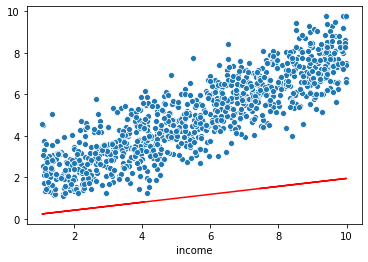

In [35]:
y_hat_new = (w_new*x + b_new)
sns.scatterplot(x,y)
plt.plot(x, y_hat_new, color='r');

In [53]:
loss(w_new, b_new, inputs=X, targets=y)

16675.316358681906

Nessa primeira rodada conseguimos fazer um ajuste da nossa reta e o nosso erro deu uma reduzida. O ideal é que rodemos esse algoritmos por um número  𝑛  de vezes, chamado épocas (ou epochs) e que ao final desse processo, tenha ocorrido uma convergência.

## Por fim, gradiente descendente em código

In [77]:
L = 1e-5 # Vamos repetir varias vezes entao é melhor reduzir a intensidade
0.00001
epochs = 6000  # The number of iterations to perform gradient descent
w, b = 0, 0 # Resetando os parâmetros da minha regressão linear
loss_history = []

for i in range(epochs):
    y_hat = predict(w, b, inputs=X)
    error = y_hat-y
    gradients = {
        'w' : 2*(error*X).mean(),
        'b' : 2*(error).mean()
    }
    w = w - L*gradients['w'] 
    b = b - L*gradients['b'] 
    
    w = w.copy()
    b = b.copy()
    
    loss_history.append(loss(w, b, inputs=X, targets=y))

## Como está a nossa reta depois de 6 mil iterações (epochs)?

Text(0.5, 0, 'loss')

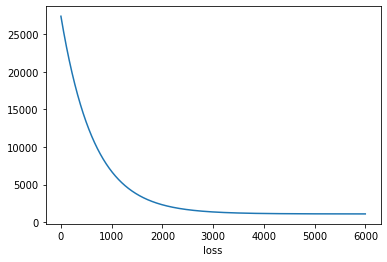

In [83]:
plt.plot(loss_history, label='loss')
plt.xlabel('loss')

## Como está a nossa reta depois de 6 mil iterações (epochs)?

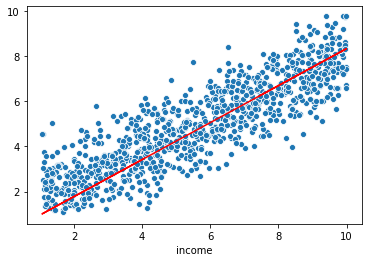

In [60]:
y_hat = w*X + b
sns.scatterplot(x, y)
plt.plot(x, y_hat, color='r');

In [85]:
print((w, b))
loss(w, b, inputs=X, targets=y)

(0.8182309519072178, 0.14361680084615364)


1091.891028277401

## Computando a regressão o com o Sklearn

In [46]:
from sklearn.linear_model import LinearRegression

# happiness = 1 + income*0.7 + bias
X_reshaped = X.reshape(-1,1)
lr = LinearRegression() # Utilizando o método dos mínimos quadrados
lr.fit(x_reshaped, y)

LinearRegression()

In [47]:
lr.intercept_, lr.coef_

(1.1805734310182316, array([0.6722904]))

In [48]:
b, w

(0.14361680084615364, 0.8182309519072178)

Conseguimos! Teoricamente encontramos o menor erro(aproximado) da nossa função! Essa técnica de otimização é conhecida como Gradiente Descendente (Gradient Descent) e é muito comum utilizá-la para otimizar diferentes modelos ! Principalmente quando temos um volume de dados muito grande :)